In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data =pd.read_csv('/content/Loan_data.xls')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
numercal = ['Loan_Amount_Term','LoanAmount']
categorical = ['Gender','Married','Dependents','Self_Employed','Credit_History']

In [7]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = KNNImputer()

In [8]:
for col in numercal:
  data[col] = imputer.fit_transform(data[[col]])

In [9]:
imputer = SimpleImputer(strategy = 'most_frequent')
for col in categorical:
    data[col] = imputer.fit_transform(data[[col]])

In [10]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
for col in data.columns:
    print(col + '\n------')
    print(data[col].value_counts())
    print('***------------------------------*****--------------------------------***')

Loan_ID
------
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
***------------------------------*****--------------------------------***
Gender
------
Male      502
Female    112
Name: Gender, dtype: int64
***------------------------------*****--------------------------------***
Married
------
Yes    401
No     213
Name: Married, dtype: int64
***------------------------------*****--------------------------------***
Dependents
------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
***------------------------------*****--------------------------------***
Education
------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
***------------------------------*****--------------------------------***
Self_Employed
------
No     532
Yes     82
Name: Self_Employed, dtype: int64
***------------------------------

In [12]:
depend ={'0':0,
         '1':1,
         '2':2,
         '3+':3}

data['Dependents'] = data['Dependents'].map(depend)

In [13]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<Axes: ylabel='LoanAmount'>

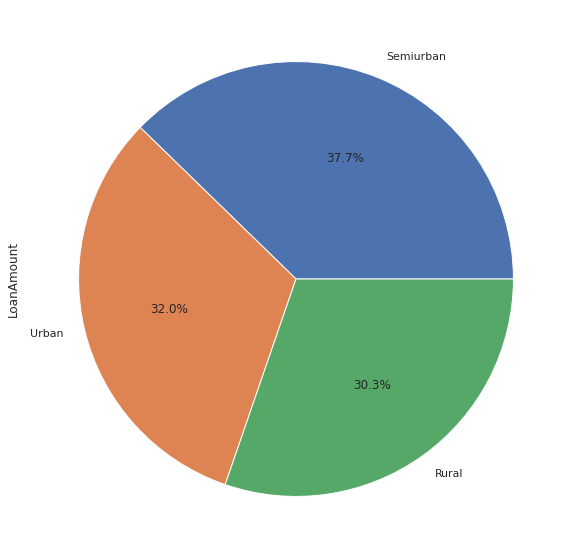

In [14]:
data.groupby('Property_Area')['LoanAmount'].sum().nlargest(10).plot(kind='pie',figsize=(20,10),autopct='%1.1f%%')

<Axes: xlabel='Education,Loan_Status'>

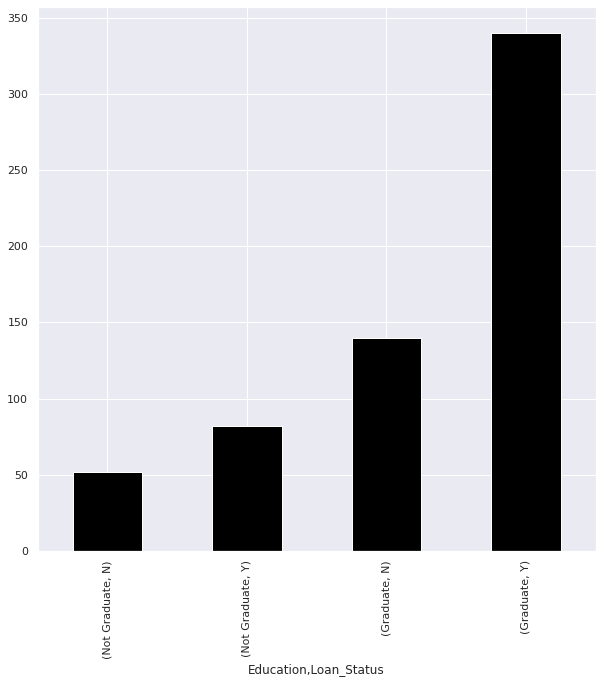

In [15]:
data.groupby('Education')['Loan_Status'].value_counts().sort_values().plot(kind='bar',figsize=(10,10),color='black')

<Axes: ylabel='Loan_Status'>

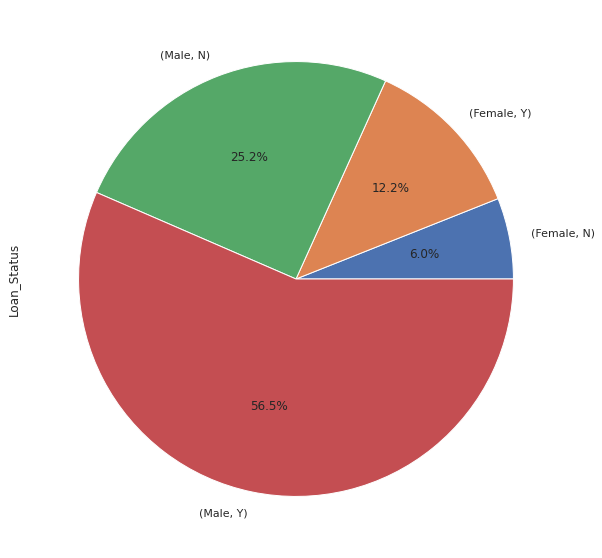

In [16]:
data.groupby('Gender')['Loan_Status'].value_counts().sort_values().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%')

<Axes: xlabel='Married,Loan_Status'>

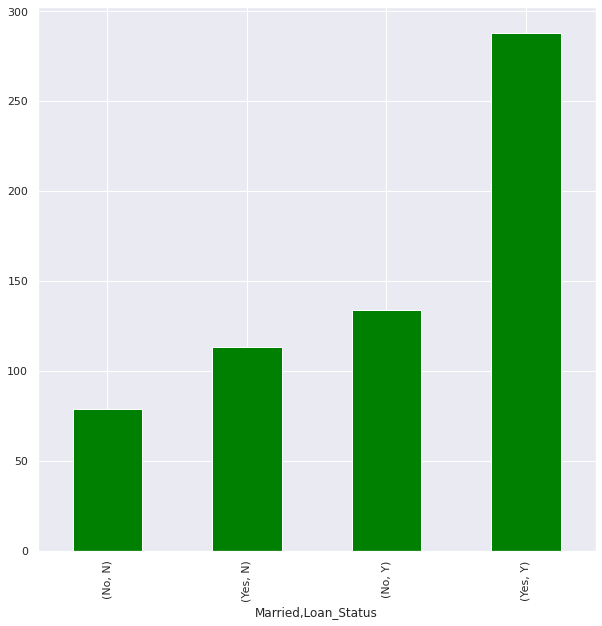

In [17]:
data.groupby('Married')['Loan_Status'].value_counts().sort_values().plot(kind='bar',figsize=(10,10),color='green')

<Axes: ylabel='Loan_Status'>

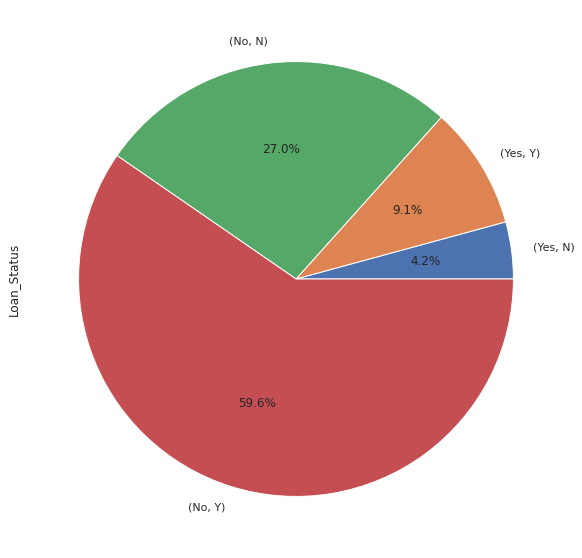

In [18]:
data.groupby('Self_Employed')['Loan_Status'].value_counts().sort_values().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%')

In [19]:
data= pd.get_dummies(data,columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)

In [20]:
data

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,LP002979,3,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0,1
611,LP002983,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1,1
612,LP002984,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1,1


In [21]:
x = data.drop(['Loan_Status_Y','Loan_ID'],axis=1)
y = data['Loan_Status_Y']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [24]:
data['Loan_Status_Y'].value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

In [25]:
from imblearn.under_sampling import (RandomUnderSampler)

In [26]:
resamp =RandomUnderSampler()
x_train ,y_train = resamp.fit_resample(x,y)

In [27]:
y_train.value_counts()

0    192
1    192
Name: Loan_Status_Y, dtype: int64

In [28]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

In [29]:
x_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
62,0,2609,3449.0,165.0,180.0,0.0,1,1,1,1,0,0
388,0,2333,2417.0,136.0,360.0,1.0,1,1,0,0,0,1
497,0,4625,2857.0,111.0,12.0,1.0,1,1,0,0,0,1
118,0,5568,2142.0,175.0,360.0,1.0,1,1,0,0,0,0
99,0,1759,3541.0,131.0,360.0,1.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,6083,4250.0,330.0,360.0,1.0,1,1,0,0,0,1
493,0,17263,0.0,225.0,360.0,1.0,0,0,1,1,1,0
252,0,2583,2167.0,104.0,360.0,1.0,1,0,1,1,0,0
431,0,6500,0.0,105.0,360.0,0.0,1,0,0,0,0,0


In [30]:
x_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
1,3,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0
2,1,12841,10968.0,349.0,360.0,1.0,1,1,0,0,1,0
3,0,1853,2840.0,114.0,360.0,1.0,1,0,0,0,0,0
4,0,3510,0.0,76.0,360.0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
379,1,4554,1229.0,158.0,360.0,1.0,1,1,1,0,0,1
380,0,10408,0.0,259.0,360.0,1.0,0,0,0,0,0,1
381,2,6250,1300.0,108.0,360.0,1.0,1,1,0,1,0,0
382,0,3103,1300.0,80.0,360.0,1.0,1,1,0,0,0,1


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score,recall_score,f1_score,fbeta_score,classification_report

In [32]:
models={
    'DT':DecisionTreeClassifier(),
    'RF':RandomForestClassifier(),
    'XGBR':XGBClassifier()
}

In [33]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------- ')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy : {accuracy_score(y_test,y_pred)}')
    print(f'Testing confusion_matrix : \n{confusion_matrix(y_test,y_pred)}')
    print(f'Testing Recall :{recall_score(y_test,y_pred)}')
    print(f'Testing precision :{precision_score(y_test,y_pred)}')
    print(f'Testing F-1 :{f1_score(y_test,y_pred)}')
    print('****-------------------------**************---------------------------****')

Training Model DT 
--------------- 
Training Accuracy: 1.0
Testing Accuracy : 0.8699186991869918
Testing confusion_matrix : 
[[41  0]
 [16 66]]
Testing Recall :0.8048780487804879
Testing precision :1.0
Testing F-1 :0.8918918918918919
****-------------------------**************---------------------------****
Training Model RF 
--------------- 
Training Accuracy: 1.0
Testing Accuracy : 0.8455284552845529
Testing confusion_matrix : 
[[41  0]
 [19 63]]
Testing Recall :0.7682926829268293
Testing precision :1.0
Testing F-1 :0.8689655172413793
****-------------------------**************---------------------------****
Training Model XGBR 
--------------- 
Training Accuracy: 1.0
Testing Accuracy : 0.8536585365853658
Testing confusion_matrix : 
[[41  0]
 [18 64]]
Testing Recall :0.7804878048780488
Testing precision :1.0
Testing F-1 :0.8767123287671234
****-------------------------**************---------------------------****


In [34]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=uint8)

In [36]:
y_test.values

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=uint8)

In [37]:
import joblib

In [39]:
joblib.dump(model, 'model.c6')

['model.c6']

In [40]:
joblib.dump(model, 'scaler.c6')

['scaler.c6']